In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random

In [2]:
dataset = pd.read_excel("Train_dataset.xlsx")
dataset.head(10)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534
5,AA6,BSE,Materials,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,AA7,NYSE,Healthcare,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
7,AA8,NSE,Real Estate,187.43,11270.15,NaN,89.69,NaN,NaN,-0.43,0.0370,74.9,0.78,6.73,861.481269
8,AA9,NSE,Materials,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811
9,AA10,JSE,Healthcare,961.02,55722.00,72.16,29.61,14385395.0,7.87,0.78,0.0292,NaN,1.21,4.42,239.085804


In [3]:
print(type(dataset))
x = dataset.iloc[:,2:14].values
y = dataset.iloc[:,-1].values
x = np.array(x)
y = np.array(y)
print("Training Data Shape: ",x.shape)

<class 'pandas.core.frame.DataFrame'>
Training Data Shape:  (7383, 12)


In [4]:
print(y.shape)

(7383,)


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(x[:,1:13])
x[:,1:13] = imputer.transform(x[:,1:13])
df = pd.DataFrame(data=x)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,Real Estate,700.29,12765.8,32.38,45.35,1.2086e+06,5.05,-0.43,0.052,1,0.61,9.2
1,Information Tech,214.52,12765.8,33.25,170.56,1.37534e+07,3.1,0.23,0.0164,1,0.944722,6.91
2,Information Tech,943.42,12765.8,88.27,143.58,6.892e+06,7.7,0.23,0.0396,1,0.944722,6.09
3,Materials,828.13,38182.1,73.66,151.76,8.31679e+06,4.8,0.03,0.0431,74.9,1.11,5.6
4,Real Estate,486.188,3351.28,23.79,105.544,3.94331e+06,8.06,-0.43,0.0244,1,1.07,9.46
5,Materials,259.61,38182.1,10.63,153.05,1.92639e+07,8.04,0.03,0.0344,74.9,1.15,5.51
6,Healthcare,635.37,12765.8,67.21,29.63,7.0861e+06,5.87,0.78,0.0186,1,0.75,8.6
7,Real Estate,187.43,11270.1,54.746,89.69,1.04183e+07,5.43684,-0.43,0.037,74.9,0.78,6.73
8,Materials,950.81,11270.1,31.5,159.58,1.36102e+06,2.72,0.03,0.0534,74.9,1.22,6.46
9,Healthcare,961.02,55722,72.16,29.61,1.43854e+07,7.87,0.78,0.0292,33.9911,1.21,4.42


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct1 = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x = np.array(ct1.fit_transform(x))
df = pd.DataFrame(data=x)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,1,700.29,12765.8,32.38,45.35,1.2086e+06,5.05,-0.43,0.052,1,0.61,9.2
1,0,0,1,0,0,214.52,12765.8,33.25,170.56,1.37534e+07,3.1,0.23,0.0164,1,0.944722,6.91
2,0,0,1,0,0,943.42,12765.8,88.27,143.58,6.892e+06,7.7,0.23,0.0396,1,0.944722,6.09
3,0,0,0,1,0,828.13,38182.1,73.66,151.76,8.31679e+06,4.8,0.03,0.0431,74.9,1.11,5.6
4,0,0,0,0,1,486.188,3351.28,23.79,105.544,3.94331e+06,8.06,-0.43,0.0244,1,1.07,9.46
5,0,0,0,1,0,259.61,38182.1,10.63,153.05,1.92639e+07,8.04,0.03,0.0344,74.9,1.15,5.51
6,0,1,0,0,0,635.37,12765.8,67.21,29.63,7.0861e+06,5.87,0.78,0.0186,1,0.75,8.6
7,0,0,0,0,1,187.43,11270.1,54.746,89.69,1.04183e+07,5.43684,-0.43,0.037,74.9,0.78,6.73
8,0,0,0,1,0,950.81,11270.1,31.5,159.58,1.36102e+06,2.72,0.03,0.0534,74.9,1.22,6.46
9,0,1,0,0,0,961.02,55722,72.16,29.61,1.43854e+07,7.87,0.78,0.0292,33.9911,1.21,4.42


In [7]:
print("Training Data Shape: ",x.shape)

Training Data Shape:  (7383, 16)


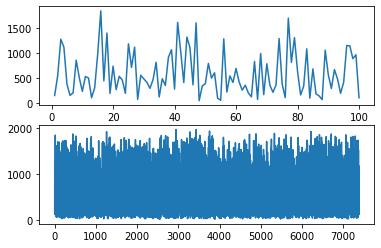

In [8]:
plt_x = np.arange(1,101,1)
plt.subplot(2,1,1)
plt.plot(plt_x,y[:100])
plt.subplot(2,1,2)
plt.plot(np.arange(1,len(x)+1,1),y)
plt.show()

In [9]:
def normalise(x,mini,maxi):
    x = np.array((x-mini)/(maxi-mini))
    return x

extreme_x = []
for i in range(x.shape[1]):
    maxi = np.max(x[:,i])
    mini = np.min(x[:,i])
    extreme_x.append([maxi,mini])
    
extreme_x = np.array(extreme_x) 

for i in range(x.shape[1]):
    x[:,i] = normalise(x[:,i],extreme_x[i][1],extreme_x[i][0])

df = pd.DataFrame(data=x)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,1,0.72403,0.179768,0.248638,0.185996,0.0346227,0.431542,0,0.794816,0,0.0144928,0.960483
1,0,0,1,0,0,0.217999,0.179768,0.258308,0.84517,0.673835,0.0935875,0.545455,0.0259179,0,0.499597,0.709111
2,0,0,1,0,0,0.977301,0.179768,0.869846,0.703132,0.324218,0.890815,0.545455,0.526998,0,0.499597,0.6191
3,0,0,0,1,0,0.857202,0.665082,0.707458,0.746196,0.396817,0.388215,0.380165,0.602592,1,0.73913,0.565313
4,0,0,0,0,1,0.500998,0,0.153162,0.502888,0.173969,0.953206,0,0.198704,0,0.681159,0.989023
5,0,0,0,1,0,0.264969,0.665082,0.00689119,0.752988,0.954621,0.94974,0.380165,0.414687,1,0.797101,0.555434
6,0,1,0,0,0,0.656402,0.179768,0.635767,0.103238,0.334108,0.573657,1,0.0734341,0,0.217391,0.894621
7,0,0,0,0,1,0.189779,0.151208,0.497232,0.419426,0.503897,0.498586,0,0.470842,1,0.26087,0.689352
8,0,0,0,1,0,0.984999,0.151208,0.238857,0.787365,0.0423892,0.0277296,0.380165,0.825054,1,0.898551,0.659715
9,0,1,0,0,0,0.995635,1,0.690786,0.103132,0.70604,0.920277,1,0.302376,0.446429,0.884058,0.435785


In [10]:
extreme_y = []
mini = np.min(y)
maxi = np.max(y)
extreme_y.append([maxi,mini])
extreme_y = np.array(extreme_y)
y = normalise(y,extreme_y[0][1],extreme_y[0][0])
df = pd.DataFrame(y)
df.head(10)

,0
0,0.074708
1,0.280783
2,0.647587
3,0.566996
4,0.190011
5,0.075575
6,0.101577
7,0.434175
8,0.256996
9,0.116598


In [11]:
def split_data(x,y,train_size=0.9,shuffle=True):
    size = len(x)
    indices = np.arange(1,size,1)
    if shuffle==True:
        random.shuffle(indices)
        
    train_samples = int(size*train_size)
    x_train = x[indices[:train_samples]]
    y_train = y[indices[:train_samples]]
    x_valid = x[indices[train_samples:]]
    y_valid = y[indices[train_samples:]]
    
    return x_train,y_train,x_valid,y_valid

x_train,y_train,x_valid,y_valid = split_data(x,y)

In [12]:
print("Training Data Shape: ",x_train.shape)
print("Validation Data Shape: ",x_valid.shape)

Training Data Shape:  (6644, 16)
Validation Data Shape:  (738, 16)


In [13]:
def build_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1]),name='input')
    x = tf.keras.layers.Dense(32,activation='relu',name='hidden1')(inputs)
    x = tf.keras.layers.Dense(64,activation='relu',name='hidden2')(x)
    x = tf.keras.layers.Dense(32,activation='relu',name='hidden3')(x)
    outputs = tf.keras.layers.Dense(1,name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="mean_squared_error")
    return model

model = build_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 16)]              0         
_________________________________________________________________
hidden1 (Dense)              (None, 32)                544       
_________________________________________________________________
hidden2 (Dense)              (None, 64)                2112      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [14]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_valid = np.asarray(x_valid).astype(np.float32)
y_valid = np.asarray(y_valid).astype(np.float32)

validation_dataset = (x_valid,y_valid)

batch_size = 8
num_epochs = 100
validation_dataset = ()
model.fit(x_train,y_train,
          validation_data = validation_dataset,
         batch_size = batch_size,
         epochs = num_epochs)

Epoch 1/100
831/831 [==============================] - 1s 826us/step - loss: 0.0089
Epoch 2/100
831/831 [==============================] - 1s 848us/step - loss: 0.0024
Epoch 3/100
831/831 [==============================] - 1s 821us/step - loss: 0.0020
Epoch 4/100
831/831 [==============================] - 1s 820us/step - loss: 0.0019
Epoch 5/100
831/831 [==============================] - 1s 855us/step - loss: 0.0018
Epoch 6/100
831/831 [==============================] - 1s 1ms/step - loss: 0.0018
Epoch 7/100
831/831 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 8/100
831/831 [==============================] - 1s 851us/step - loss: 0.0016
Epoch 9/100
831/831 [==============================] - 1s 1ms/step - loss: 0.0016
Epoch 10/100
831/831 [==============================] - 1s 934us/step - loss: 0.0016
Epoch 11/100
831/831 [==============================] - 1s 776us/step - loss: 0.0015
Epoch 12/100
831/831 [==============================] - 1s 832us/step - loss: 0.

831/831 [==============================] - 1s 752us/step - loss: 7.2846e-04
Epoch 97/100
831/831 [==============================] - 1s 765us/step - loss: 8.1979e-04
Epoch 98/100
831/831 [==============================] - 1s 754us/step - loss: 8.3883e-04
Epoch 99/100
831/831 [==============================] - 1s 758us/step - loss: 7.7870e-04
Epoch 100/100
831/831 [==============================] - 1s 752us/step - loss: 7.1247e-04


In [15]:
print(type(x_train))
print(type(y_train))
print(x_train.shape)
print(y_train.shape)
print(x_train[0].shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(6644, 16)
(6644,)
(16,)


In [16]:
pred_temp = model.predict(x_valid[0].reshape(1,16))
print(pred_temp)
print(y_valid[0])

[[0.2753912]]
0.2790691


In [17]:
dataset = pd.read_excel("Test_dataset.xlsx")
dataset.head(10)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18
5,AC3240,NSE,Healthcare,301.09,11270.15,25.27,149.36,9878930.0,8.17,0.78,0.0233,74.9,NaN,1.12
6,AC3241,BSE,Materials,227.28,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.23,4.60
7,AC3242,S&P 500,Real Estate,NaN,NaN,73.40,121.63,4070029.0,6.11,-0.43,0.0504,1.0,1.00,4.72
8,AC3243,NSE,Energy,NaN,NaN,54.33,169.47,13609149.0,4.93,0.11,0.0609,74.9,1.00,3.96
9,AC3244,NSE,Healthcare,727.98,11270.15,99.59,139.23,12499327.0,4.65,0.78,0.0206,74.9,1.07,2.58


In [18]:
x_test = dataset.iloc[:,2:].values
x_test = np.array(x_test)
print(x_test.shape)

(3331, 12)


In [19]:
imputer1 = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer1.fit(x_test[:,1:])
x_test[:,1:] = imputer1.transform(x_test[:,1:])

In [20]:
ct2 = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x_test = np.array(ct2.fit_transform(x_test))
df = pd.DataFrame(data=x_test)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,1,0,53.3,11270.1,44.59,185.09,1.20679e+07,2.78,0.03,0.033,74.9,0.8,4.66
1,1,0,0,0,0,749.34,55722,74.2,34.01,6.17247e+06,6.78,0.11,0.0464,17.7,0.86,6.11
2,0,0,1,0,0,567.75,3351.28,88.41,177.4,1.74725e+07,4.36,0.23,0.0401,1,0.93,4.99
3,0,1,0,0,0,646.78,11270.1,79.36,105.44,1.55532e+07,2.77,0.78,0.0187,74.9,1.09,1.26
4,0,0,0,1,0,380.33,12765.8,19.9,139.4,1.25258e+07,5.93,0.03,0.0261,1,0.938828,6.18
5,0,1,0,0,0,301.09,11270.1,25.27,149.36,9.87893e+06,8.17,0.78,0.0233,74.9,0.938828,1.12
6,0,0,0,1,0,227.28,38182.1,38.5,193.01,4.9349e+06,4.91,0.03,0.0265,74.9,1.23,4.6
7,0,0,0,0,1,488.573,25099.4,73.4,121.63,4.07003e+06,6.11,-0.43,0.0504,1,1,4.72
8,1,0,0,0,0,488.573,25099.4,54.33,169.47,1.36091e+07,4.93,0.11,0.0609,74.9,1,3.96
9,0,1,0,0,0,727.98,11270.1,99.59,139.23,1.24993e+07,4.65,0.78,0.0206,74.9,1.07,2.58


In [21]:
extreme_xt = []
for i in range(x_test.shape[1]):
    maxi = np.max(x_test[:,i])
    mini = np.min(x_test[:,i])
    extreme_xt.append([maxi,mini])
    
extreme_xt = np.array(extreme_xt) 

for i in range(x_test.shape[1]):
    x_test[:,i] = normalise(x_test[:,i],extreme_xt[i][1],extreme_xt[i][0])

df = pd.DataFrame(data=x_test)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,1,0,0.0498234,0.151208,0.383819,0.921651,0.588707,0.0381282,0.380165,0.384449,1,0.289855,0.46213
1,1,0,0,0,0,0.775175,1,0.713332,0.126158,0.288045,0.731369,0.446281,0.673866,0.225981,0.376812,0.621295
2,0,0,1,0,0,0.585938,0,0.871467,0.88116,0.86434,0.311958,0.545455,0.537797,0,0.478261,0.498353
3,0,1,0,0,0,0.668296,0.151208,0.770755,0.502264,0.766455,0.0363951,1,0.075594,1,0.710145,0.0889133
4,0,0,0,1,0,0.390625,0.179768,0.109059,0.681076,0.612061,0.584055,0.380165,0.235421,0,0.491056,0.628979
5,0,1,0,0,0,0.308048,0.151208,0.168818,0.733519,0.477073,0.97227,1,0.174946,1,0.491056,0.0735456
6,0,0,0,1,0,0.23113,0.665082,0.316047,0.963353,0.22493,0.407279,0.380165,0.24406,1,0.913043,0.455543
7,0,0,0,0,1,0.503426,0.415272,0.704429,0.587511,0.180822,0.615251,0,0.760259,0,0.57971,0.468716
8,1,0,0,0,0,0.503426,0.415272,0.49221,0.839406,0.667312,0.410745,0.446281,0.987041,1,0.57971,0.385291
9,0,1,0,0,0,0.752915,0.151208,0.995882,0.680181,0.610711,0.362218,1,0.116631,1,0.681159,0.233809


In [22]:
x_test = np.asarray(x_test).astype(np.float32)
y_pred = model.predict(x_test)
print(y_pred[:10])

[[0.39594862]
 [0.12006515]
 [0.7906865 ]
 [0.42711008]
 [0.12593585]
 [0.17783725]
 [0.34942448]
 [0.43551528]
 [0.45776924]
 [0.705914  ]]


In [24]:
print(type(y_pred))
print(np.max(y_pred))

<class 'numpy.ndarray'>
0.9688833


In [28]:
y_pred_un = y_pred*(extreme_y[0][0]-extreme_y[0][1]) + extreme_y[0][1]

In [31]:
print(y_pred_un.shape)
df = pd.DataFrame(data = y_pred_un)
df.head(10)

(3331, 1)


,0
0,786.564270
1,245.880402
2,1560.182251
3,847.635376
4,257.385956
5,359.103729
6,695.385010
7,864.108093
8,907.722046
9,1394.042847


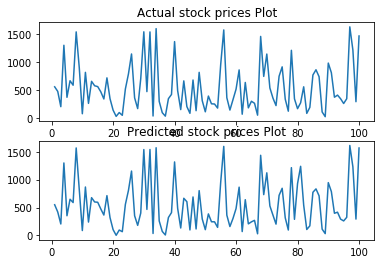

In [51]:
y_pred_valid = model.predict(x_valid)
y_pred_valid_un = y_pred_valid*(extreme_y[0][0]-extreme_y[0][1]) + extreme_y[0][1]
y_pred_valid_un = y_pred_valid_un.reshape(y_pred_valid_un.shape[0])
y_valid_un = y_valid*(extreme_y[0][0]-extreme_y[0][1]) + extreme_y[0][1]
plt_x = np.arange(1,101,1)
plt.subplot(2,1,1)
plt.plot(plt_x,y_valid_un[:100])
plt.title("Actual stock prices Plot")
print('\n')
plt.subplot(2,1,2)
plt.title("Predicted stock prices Plot")
plt.plot(plt_x,y_pred_valid_un[:100])
plt.show()

In [49]:
y_pred_valid_un = y_pred_valid_un.reshape(y_pred_valid_un.shape[0],1)
y_valid_un = y_valid_un.reshape(y_valid_un.shape[0],1)
y_check = np.concatenate([y_pred_valid_un,y_valid_un],axis=1)
df = pd.DataFrame(data = y_check)
df.head(10)

,0,1
0,550.292603,557.500671
1,420.259460,475.061005
2,206.037491,202.501358
3,1297.919678,1300.128784
4,353.421692,369.768860
5,648.377441,665.532471
6,589.330627,585.826355
7,1566.545410,1539.396362
8,823.324585,900.249146
9,88.473801,75.956314
